In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
#pandas csv
ablations_df = pd.read_csv('../data/230807_mlp_neuron_ablations.csv')
losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')
print(losses_df.columns)
print(ablations_df.columns)

Index(['moves played', 'steps till end state', 'winner', 'rotation 1',
       'rotation 2', 'rotation 3', 'horizontal flip', 'vertical flip',
       'training index', 'train or test', 'first win condition',
       'second win condition', 'end move loss'],
      dtype='object')
Index(['moves played', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '502', '503', '504', '505', '506', '507', '508', '509', '510', '511'],
      dtype='object', length=513)


/tmp/ipykernel_763450/371407668.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')


In [4]:
losses_df = losses_df[['moves played', 'first win condition', 'end move loss']]
#convert ablations_df to object
ablations_df = ablations_df.astype(object)


In [5]:
ablations_df['moves played'] = losses_df['moves played']

In [6]:
ablations_df.head()

,moves played,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,"[0, 1, 3, 2, 6]",0.000008,0.000008,0.000497,0.00001,0.000001,1.097605,0.000004,0.000005,0.000002,...,0.000005,0.0,0.000003,0.000004,0.000002,0.000005,0.000006,0.000008,0.000051,0.000006
1,"[0, 1, 3, 4, 6]",0.000195,0.000189,0.036626,0.000232,0.000003,3.076243,0.000077,0.000098,0.000029,...,0.000118,0.000012,0.000041,0.000081,0.000042,0.0001,0.000123,0.000181,0.000794,0.000149
2,"[0, 1, 3, 5, 6]",0.000011,0.000011,0.000807,0.000013,0.0,1.423348,0.000005,0.000005,0.000003,...,0.000006,0.000001,0.000002,0.000003,0.000003,0.000005,0.000007,0.00001,0.000073,0.000009
3,"[0, 1, 3, 7, 6]",0.000015,0.000014,0.00213,0.000017,0.000001,1.009675,0.000005,0.000007,0.000003,...,0.000009,0.000001,0.000003,0.000005,0.000004,0.000008,0.000008,0.000012,0.000072,0.00001
4,"[0, 1, 3, 8, 6]",0.000022,0.000021,0.001409,0.000025,0.000001,1.193816,0.00001,0.00001,0.000005,...,0.000014,0.000001,0.000008,0.000009,0.000005,0.000012,0.000013,0.000019,0.00013,0.000016


In [7]:
merged_df = pd.merge(ablations_df, losses_df, on='moves played', how='inner')

In [8]:
merged_df.head()

,moves played,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,first win condition,end move loss
0,"[0, 1, 3, 2, 6]",0.000008,0.000008,0.000497,0.00001,0.000001,1.097605,0.000004,0.000005,0.000002,...,0.000003,0.000004,0.000002,0.000005,0.000006,0.000008,0.000051,0.000006,left column,0.000005
1,"[0, 1, 3, 4, 6]",0.000195,0.000189,0.036626,0.000232,0.000003,3.076243,0.000077,0.000098,0.000029,...,0.000041,0.000081,0.000042,0.0001,0.000123,0.000181,0.000794,0.000149,left column,0.000114
2,"[0, 1, 3, 5, 6]",0.000011,0.000011,0.000807,0.000013,0.0,1.423348,0.000005,0.000005,0.000003,...,0.000002,0.000003,0.000003,0.000005,0.000007,0.00001,0.000073,0.000009,left column,0.000007
3,"[0, 1, 3, 7, 6]",0.000015,0.000014,0.00213,0.000017,0.000001,1.009675,0.000005,0.000007,0.000003,...,0.000003,0.000005,0.000004,0.000008,0.000008,0.000012,0.000072,0.00001,left column,0.000008
4,"[0, 1, 3, 8, 6]",0.000022,0.000021,0.001409,0.000025,0.000001,1.193816,0.00001,0.00001,0.000005,...,0.000008,0.000009,0.000005,0.000012,0.000013,0.000019,0.00013,0.000016,left column,0.000013


In [9]:
def add_epsilon(val, column):
    if column in ['moves played', 'first win condition']:
        return val
    return val + 10e-8

merged_df = merged_df.apply(lambda col: col.map(lambda val: add_epsilon(val, col.name)))

merged_df.iloc[-1]

moves played           [8, 7, 6, 5, 4, 3, 1, 2, 0]
0                                              0.0
1                                              0.0
2                                              0.0
3                                              0.0
                                  ...             
509                                            0.0
510                                            0.0
511                                            0.0
first win condition       top left -> bottom right
end move loss                                  0.0
Name: 255167, Length: 515, dtype: object

In [10]:
for col in merged_df.columns:
    if col not in ['moves played', 'end move loss', 'first win condition']:
        merged_df[col] = np.log10(merged_df[col] / merged_df['end move loss'])

normalized_ablation_losses_df = merged_df.drop(columns=['end move loss'])

In [11]:
normalized_ablation_losses_df.head()
#count all nans
normalized_ablation_losses_df.isna().sum().sum()

46080

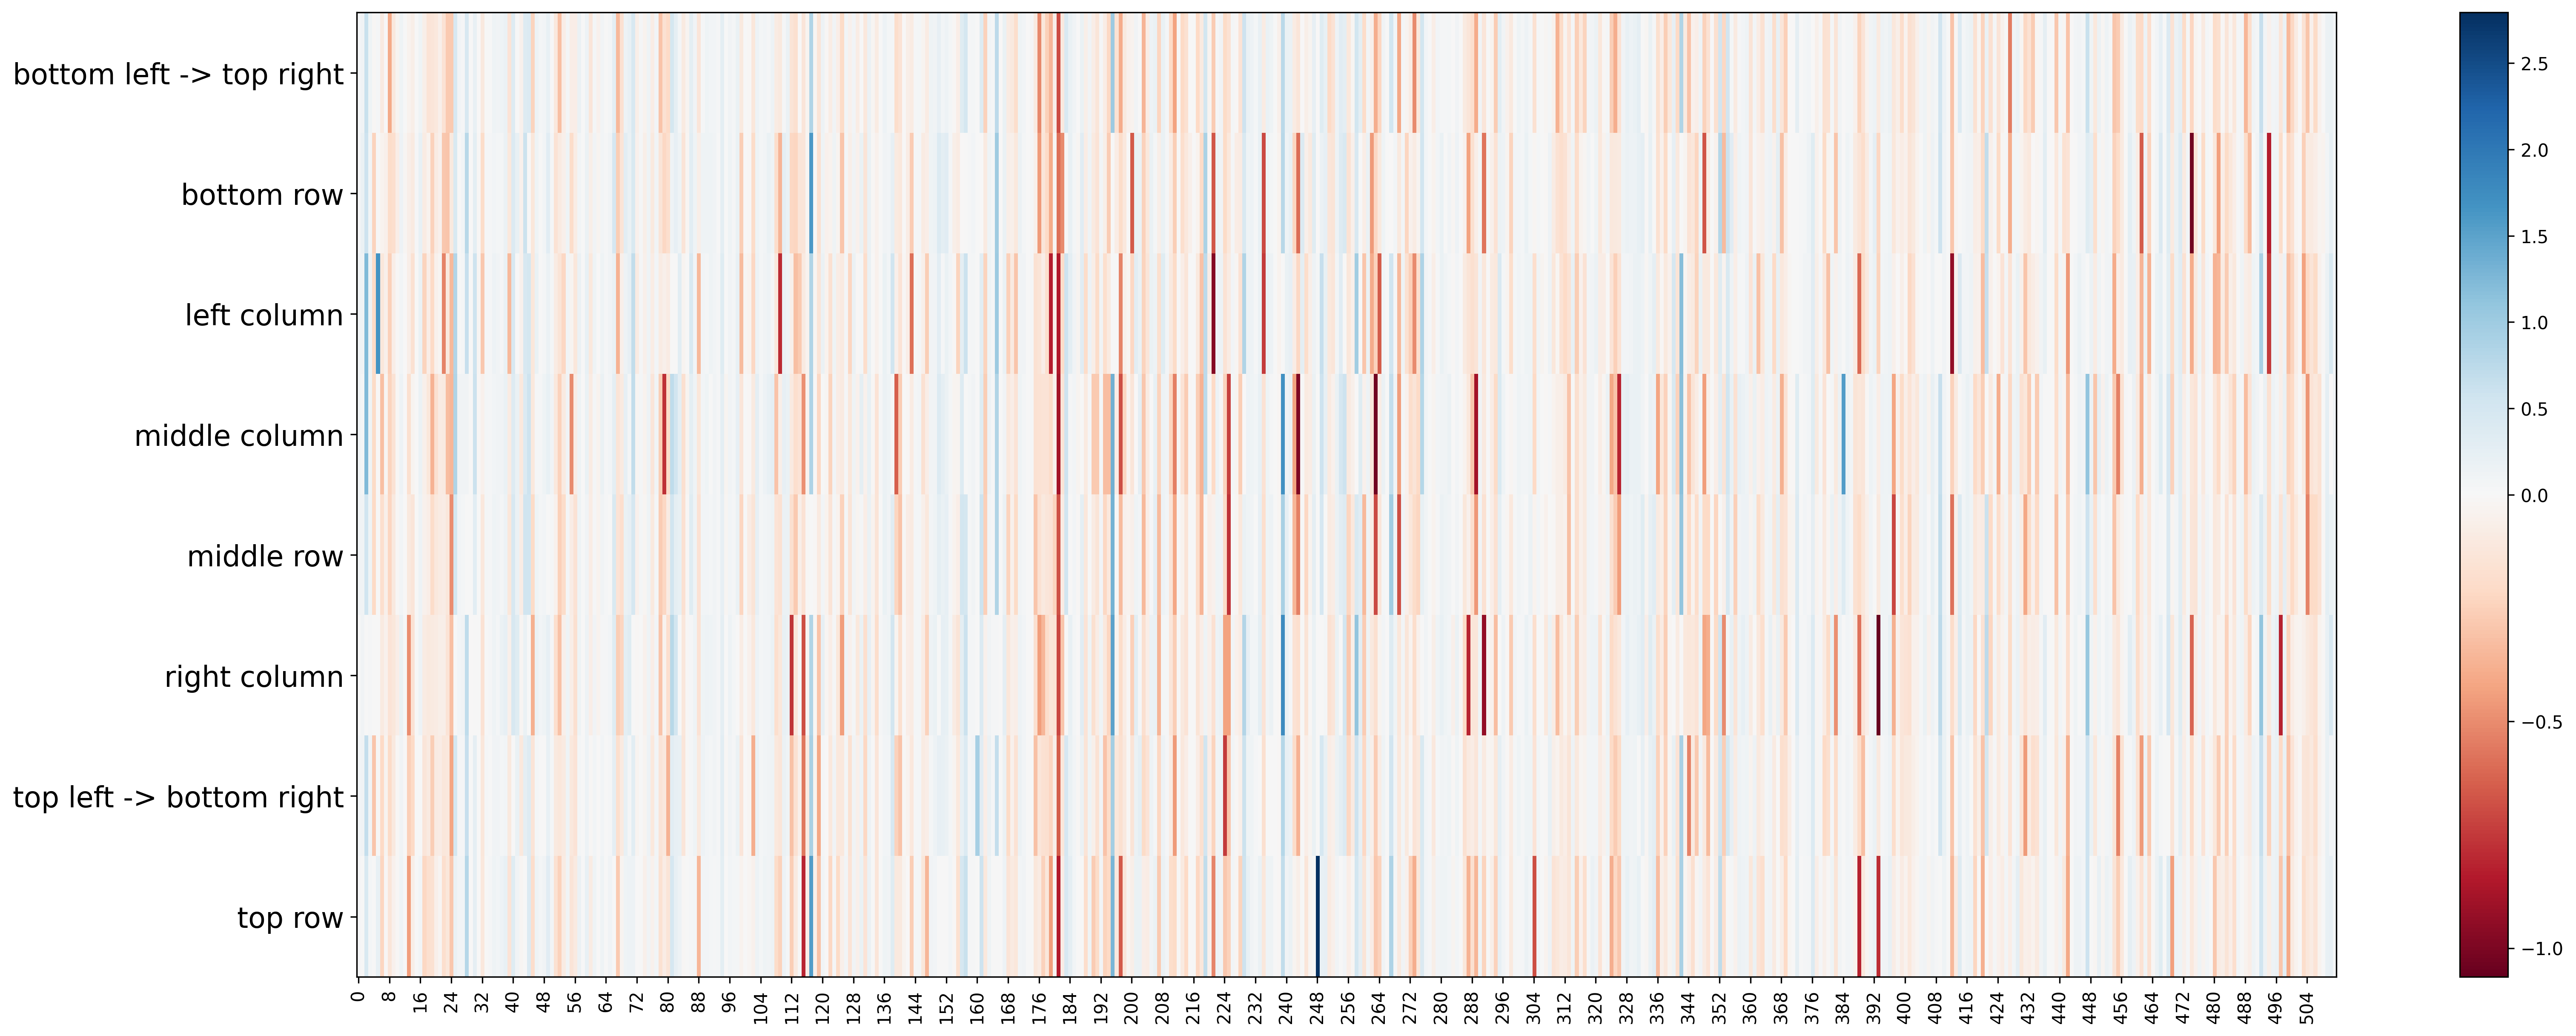

In [13]:
#figure size
plt.rcParams["figure.figsize"] = (25, 10)
plt.rcParams["figure.dpi"] = 300
grouped = normalized_ablation_losses_df.groupby(["first win condition"])
norm = mcolors.TwoSlopeNorm(vcenter=0)
plt.imshow(grouped.mean(), cmap='RdBu', norm=norm, interpolation="nearest",aspect='auto')
plt.colorbar()
# legend
plt.xticks(np.arange(0, 512, 8), labels=grouped.mean().columns[::8]);
# yticks
plt.yticks(np.arange(0, 8), labels=grouped.mean().index);
#y tick size
plt.tick_params(axis='y', which='major', labelsize=16)
#tilt x ticks
plt.xticks(rotation=90);

In [2]:
losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')
#first row where moves played is >5
game_position_5 = losses_df[losses_df['steps till end state'] > 5].index[0]
game_position_6 = losses_df[losses_df['steps till end state'] > 6].index[0]
game_position_7 = losses_df[losses_df['steps till end state'] > 7].index[0]
game_position_8 = losses_df[losses_df['steps till end state'] > 8].index[0]

/tmp/ipykernel_764902/940343245.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  losses_df = pd.read_csv('../data/prob all 8 layer control-20230718-185339_stats.csv')


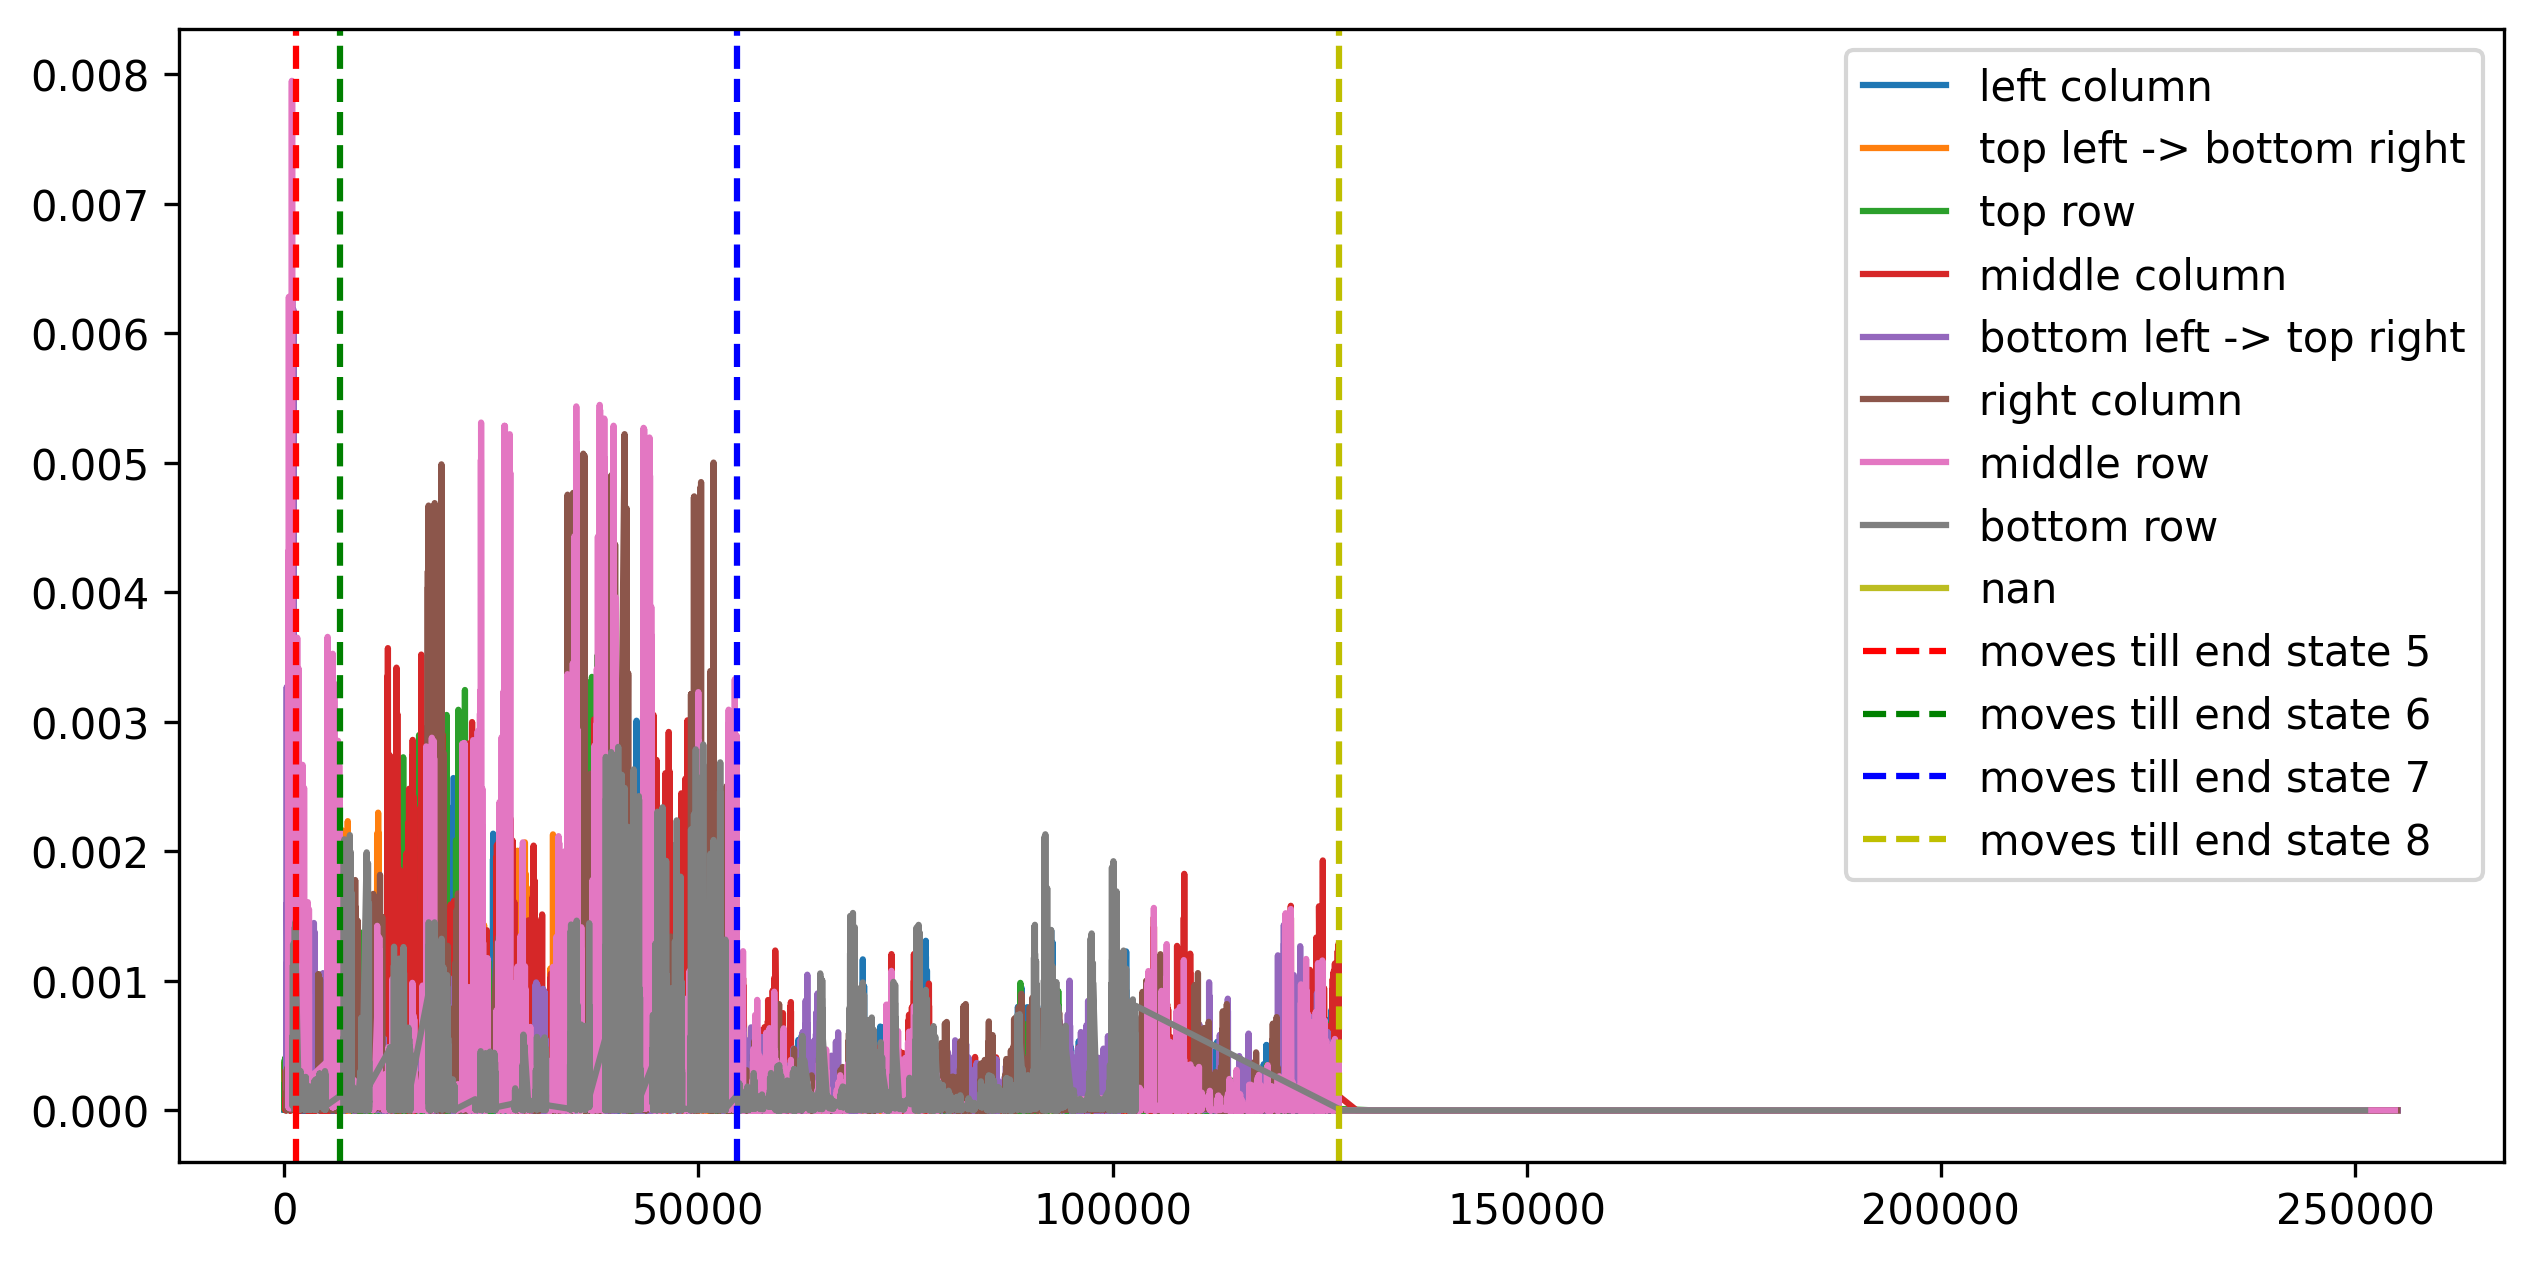

In [4]:
#plot losses_df 'moves played' vs 'end move loss'
plt.figure(figsize=(10,5))
#fig dpi
plt.rcParams['figure.dpi'] = 300
win_conditions = losses_df['first win condition'].unique()
for win_condition in win_conditions:
    plt.plot(losses_df[losses_df['first win condition']==win_condition]['end move loss'], label=win_condition)
#plot vertical line at game_position_5
plt.axvline(x=game_position_5, color='r', linestyle='--', label='moves till end state 5')
plt.axvline(x=game_position_6, color='g', linestyle='--', label='moves till end state 6')
plt.axvline(x=game_position_7, color='b', linestyle='--', label='moves till end state 7')
plt.axvline(x=game_position_8, color='y', linestyle='--', label='moves till end state 8')
#legend
plt.legend(loc='upper right')
plt.show()

In [18]:
#save normalized ablated loss as csv
normalized_ablation_losses_df['steps till end state'] = losses_df['steps till end state']
normalized_ablation_losses_df.to_csv('../data/230808_normalized_ablation_losses.csv')